In [1]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.formula.api as sm


import seaborn; seaborn.set()
import datetime

In [2]:
df = pd.read_csv("tempDB.csv",names=['date','freezer','refrigerator'])

In [3]:
df['date'] = pd.to_datetime(df['date'])

In [4]:
df.dtypes

date            datetime64[ns]
freezer                float64
refrigerator           float64
dtype: object

In [5]:
df.set_index('date',inplace=True)
df = df[df.index.notnull()]
#df.index = df['date']


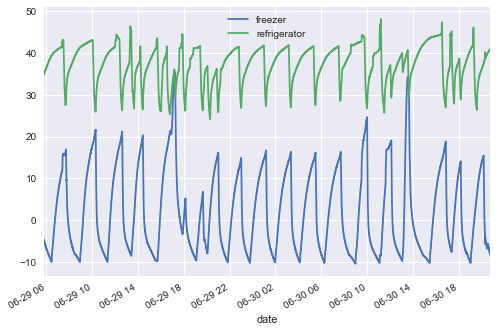

In [8]:
df.tail(50000).plot()

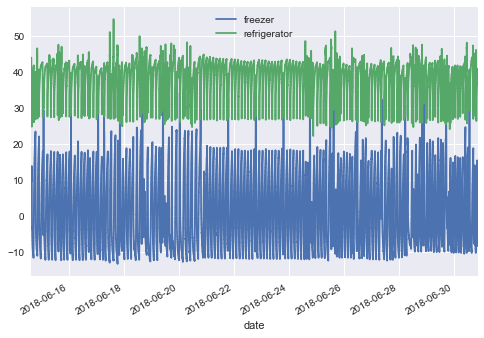

In [10]:
df.tail(500000).plot()

NameError: name 'ticker' is not defined

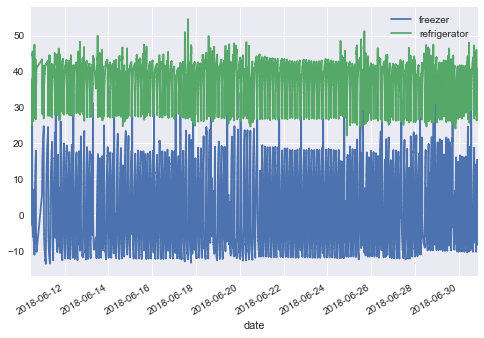

In [7]:
#fig, ax = plt.subplots()
#ax.plot(df.date)
#ax.xaxis.set_major_locator(mdates.HourLocator())
#ax.xaxis.set_minor_locator(mdates.MinuteLocator())

#fig,ax = plt.subplots()
#ax.plot(df.refrigerator)
ax = df.plot()


#ticklabels = df.index.strftime('%Y-%m-%d\n%H:%M')
ax.xaxis.set_major_locator = mdates.HourLocator()
#ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.xaxis.set_minor_formatter = mdates.MinuteLocator()

#datemin = datetime.date(df.index.min().hour,1,1)
#datemax = datetime.date(df.index.max().hour,1,1)
#ax.set_xlim(datemin,datemax)

fig.autofmt_xdate()

plt.show()


In [ ]:
plt.plot_date(x=df.index,y=df,markersize=1)
plt.show()

In [ ]:
lm_frige = pd.ols(x=pd.to_datetime(df.index).dt.hour,y=df.regrigerator)

In [ ]:
df['date_delta'] = (df['date'] - df['date'].min())  / np.timedelta64(1,'D')

In [ ]:
frige_result = sm.ols(formula = 'refrigerator ~ date_delta',data=df).fit()

In [77]:
print(frige_result)